In [3]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [50]:
import pandas as pd
insurance_df = pd.read_csv("/gdrive/MyDrive/BigDataStudy/insurance.csv")

In [51]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1347 entries, 0 to 1346
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Number         1347 non-null   int64  
 1   age            1345 non-null   float64
 2   Gender         1345 non-null   object 
 3   bmi            1346 non-null   float64
 4   children       1346 non-null   float64
 5   smoker         1346 non-null   object 
 6   region         1346 non-null   object 
 7   Insurance Fee  1345 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 84.3+ KB


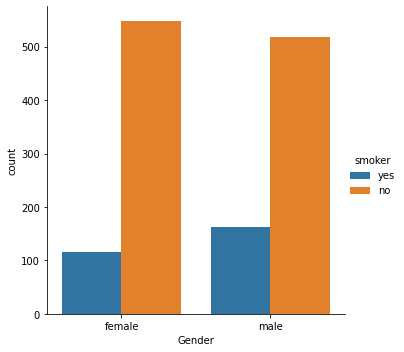

In [52]:
import seaborn as sns
sns.catplot(x = "Gender", hue = "smoker",
            kind = "count", data = insurance_df)

In [53]:
insurance_df.head()

,Number,age,Gender,bmi,children,smoker,region,Insurance Fee
0,1,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,2,18.0,male,33.770,1.0,no,southeast,1725.55230
2,3,28.0,male,33.000,3.0,no,southeast,4449.46200
3,4,33.0,male,22.705,0.0,no,northwest,21984.47061
4,5,32.0,male,28.880,0.0,no,northwest,3866.85520


#1. 불필요한 열 제거

In [54]:
# number columns 제거

insurance_df.drop(columns='Number', inplace= True)
insurance_df.head()

,age,Gender,bmi,children,smoker,region,Insurance Fee
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


#2. 중복 데이터 찾기 및 제거

In [55]:
insurance_df[insurance_df.duplicated()]

,age,Gender,bmi,children,smoker,region,Insurance Fee
505,62.0,female,39.20,0.0,no,southwest,13470.8600
506,29.0,male,34.40,0.0,yes,southwest,36197.6990
507,43.0,male,26.03,0.0,no,northeast,6837.3687
508,51.0,male,23.21,1.0,yes,southeast,22218.1149
509,19.0,male,30.25,0.0,yes,southeast,32548.3405
510,38.0,female,28.93,1.0,no,southeast,5974.3847
587,19.0,male,30.59,0.0,no,northwest,1639.5631
1344,18.0,female,36.85,0.0,no,southeast,1629.8335
1345,21.0,female,25.80,0.0,no,southwest,2007.9450
1346,61.0,female,29.07,0.0,yes,northwest,29141.3603


In [56]:
insurance_df.tail()

,age,Gender,bmi,children,smoker,region,Insurance Fee
1342,21.0,female,25.80,0.0,no,southwest,2007.9450
1343,61.0,female,29.07,0.0,yes,northwest,29141.3603
1344,18.0,female,36.85,0.0,no,southeast,1629.8335
1345,21.0,female,25.80,0.0,no,southwest,2007.9450
1346,61.0,female,29.07,0.0,yes,northwest,29141.3603


In [57]:
insurance_df.drop_duplicates(inplace=True)
insurance_df[insurance_df.duplicated()]
insurance_df.tail()

,age,Gender,bmi,children,smoker,region,Insurance Fee
1339,50.0,male,30.97,3.0,no,northwest,10600.5483
1340,18.0,female,31.92,0.0,no,northeast,2205.9808
1341,18.0,female,36.85,0.0,no,southeast,1629.8335
1342,21.0,female,25.80,0.0,no,southwest,2007.9450
1343,61.0,female,29.07,0.0,yes,northwest,29141.3603


#3. null 값 제거

In [58]:
insurance_df.isnull().head(10)

,age,Gender,bmi,children,smoker,region,Insurance Fee
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


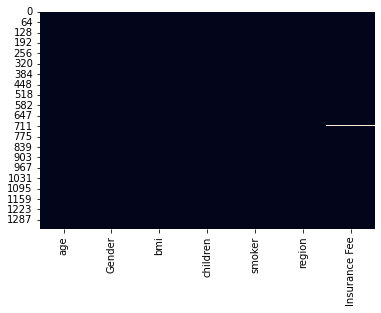

In [59]:
sns.heatmap(insurance_df.isnull(), cbar=False)   # 누락 히트맵

In [60]:
insurance_df.isnull().sum()   # 누락 요약 확인

age              2
Gender           2
bmi              1
children         1
smoker           1
region           1
Insurance Fee    2
dtype: int64

In [26]:
insurance_df.dropna(inplace=True)   # 제거부분 
insurance_df.isnull().sum()          # 누락 적을 시 제거가 좋음

age              0
Gender           0
bmi              0
children         0
smoker           0
region           0
Insurance Fee    0
dtype: int64

#4. rename() 이용해서 열 이름 바꾸기

In [27]:
insurance_df.columns

Index(['age', 'Gender', 'bmi', 'children', 'smoker', 'region',
       'Insurance Fee'],
      dtype='object')

In [28]:
insurance_df.rename(columns={          # gender, charges로 열 이름 변경
    'Gender':'gender',
    'Insurance Fee': 'charges',
}, inplace = True)
insurance_df.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

#5. replace() 이용해 행의 값 바꾸기

In [29]:
insurance_df.head()

,age,gender,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [30]:
insurance_df.replace({'gender' : {'female' : 1}}, inplace = True)
insurance_df.replace({'gender' : {'male' : 0}}, inplace = True)
insurance_df.head()

,age,gender,bmi,children,smoker,region,charges
0,19.0,1,27.900,0.0,yes,southwest,16884.92400
1,18.0,0,33.770,1.0,no,southeast,1725.55230
2,28.0,0,33.000,3.0,no,southeast,4449.46200
3,33.0,0,22.705,0.0,no,northwest,21984.47061
4,32.0,0,28.880,0.0,no,northwest,3866.85520


#6. 이상 값 처리

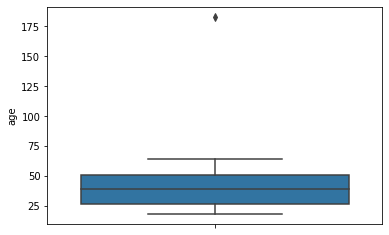

In [31]:
sns.boxplot(y = insurance_df['age'])

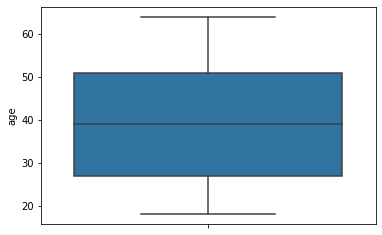

In [39]:
insurance_df.drop(insurance_df[insurance_df.age >= 100].index,
                  inplace = True)
sns.boxplot(y = insurance_df['age'])

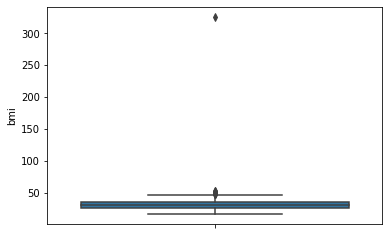

In [33]:
sns.boxplot(y = insurance_df['bmi'])

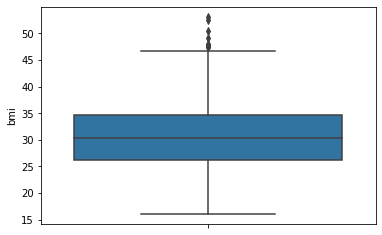

In [40]:
insurance_df.drop(insurance_df[insurance_df.bmi >= 300].index,
                  inplace = True)
sns.boxplot(y = insurance_df['bmi'])

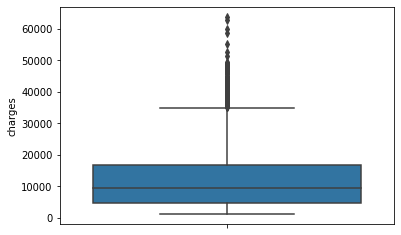

In [38]:
sns.boxplot(y = insurance_df['charges'])

#7. Min-max 방법 이용한 데이터 정규화

In [41]:
insurance_df.describe()

,age,gender,bmi,children,charges
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000
mean,39.231753,0.493604,30.642739,1.097818,13319.283467
std,14.041371,0.500147,6.089270,1.207183,12132.238313
min,18.000000,0.000000,15.960000,0.000000,1121.873900
25%,27.000000,0.000000,26.220000,0.000000,4747.052900
50%,39.000000,0.000000,30.360000,1.000000,9391.346000
75%,51.000000,1.000000,34.600000,2.000000,16796.411940
max,64.000000,1.000000,53.130000,5.000000,63770.428010


In [42]:
from sklearn.preprocessing import MinMaxScaler   # charges columns nomalize
scaler = MinMaxScaler()
insurance_df[['charges']] = scaler.fit_transform(insurance_df[['charges']])
insurance_df.describe()

,age,gender,bmi,children,charges
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000
mean,39.231753,0.493604,30.642739,1.097818,0.194696
std,14.041371,0.500147,6.089270,1.207183,0.193656
min,18.000000,0.000000,15.960000,0.000000,0.000000
25%,27.000000,0.000000,26.220000,0.000000,0.057865
50%,39.000000,0.000000,30.360000,1.000000,0.131998
75%,51.000000,1.000000,34.600000,2.000000,0.250198
max,64.000000,1.000000,53.130000,5.000000,1.000000


In [43]:
insurance_df[['children']] = scaler.fit_transform(insurance_df[['children']])  # children normalize
insurance_df.describe()

,age,gender,bmi,children,charges
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000
mean,39.231753,0.493604,30.642739,0.219564,0.194696
std,14.041371,0.500147,6.089270,0.241437,0.193656
min,18.000000,0.000000,15.960000,0.000000,0.000000
25%,27.000000,0.000000,26.220000,0.000000,0.057865
50%,39.000000,0.000000,30.360000,0.200000,0.131998
75%,51.000000,1.000000,34.600000,0.400000,0.250198
max,64.000000,1.000000,53.130000,1.000000,1.000000


In [44]:
insurance_df[['bmi']] = scaler.fit_transform(insurance_df[['bmi']]) # bmi normalize
insurance_df.describe()

,age,gender,bmi,children,charges
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000
mean,39.231753,0.493604,0.395016,0.219564,0.194696
std,14.041371,0.500147,0.163822,0.241437,0.193656
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,0.276029,0.000000,0.057865
50%,39.000000,0.000000,0.387409,0.200000,0.131998
75%,51.000000,1.000000,0.501480,0.400000,0.250198
max,64.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
insurance_df[['age']] = scaler.fit_transform(insurance_df[['age']])  # age normalize
insurance_df.describe()

,age,gender,bmi,children,charges
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000
mean,0.461560,0.493604,0.395016,0.219564,0.194696
std,0.305247,0.500147,0.163822,0.241437,0.193656
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195652,0.000000,0.276029,0.000000,0.057865
50%,0.456522,0.000000,0.387409,0.200000,0.131998
75%,0.717391,1.000000,0.501480,0.400000,0.250198
max,1.000000,1.000000,1.000000,1.000000,1.000000


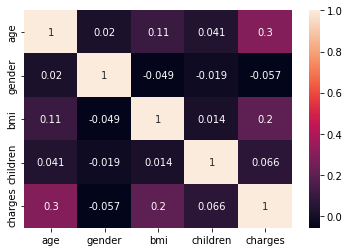

In [46]:
sns.heatmap(insurance_df.corr(), annot=True)

In [ ]:
# 위 correlation heatmap 에서 charges 와 gender 의 경우 다른 columns 에 비해 상관 관계가 거의 없다

In [47]:
insurance_df.drop(columns='gender', inplace= True)
insurance_df.head()

,age,bmi,children,smoker,region,charges
0,0.021739,0.321227,0.0,yes,southwest,0.251611
1,0.000000,0.479150,0.2,no,southeast,0.009636
2,0.217391,0.458434,0.6,no,southeast,0.053115
3,0.326087,0.181464,0.0,no,northwest,0.333010
4,0.304348,0.347592,0.0,no,northwest,0.043816


In [48]:
# smoker column 의 경우도 charges columns와 상관이 없다\
insurance_df.drop(columns='smoker', inplace= True)
insurance_df.head()

,age,bmi,children,region,charges
0,0.021739,0.321227,0.0,southwest,0.251611
1,0.000000,0.479150,0.2,southeast,0.009636
2,0.217391,0.458434,0.6,southeast,0.053115
3,0.326087,0.181464,0.0,northwest,0.333010
4,0.304348,0.347592,0.0,northwest,0.043816
